#1. Regression

#(a) Load the data into memory. Make an appropriate X matrix and y vector.

In [16]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')
print(df.head(5))
# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("Data loaded successfully.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Data loaded successfully.
Shape of X: (768, 8)
Shape of y: (768,)


#(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances)

In [17]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully.")
print("Shape of Xtrain:", Xtrain.shape)
print("Shape of Xtest:", Xtest.shape)
print("Shape of ytrain:", ytrain.shape)
print("Shape of ytest:", ytest.shape)

Data split successfully.
Shape of Xtrain: (614, 8)
Shape of Xtest: (154, 8)
Shape of ytrain: (614,)
Shape of ytest: (154,)


# (c) Give the objective of logistic regression with L2 regularization.

The objective of logistic regression with L2 regularization is to minimize the following function:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$$

Where:
- $m$ is the number of training examples.
- $y^{(i)}$ is the true label for the $i$-th example.
- $h_\theta(x^{(i)})$ is the predicted probability of the $i$-th example belonging to the positive class, given by the sigmoid function: $h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$.
- $\theta$ is the vector of model parameters (weights).
- $\lambda$ is the regularization parameter, which controls the strength of the L2 regularization.
- $\sum_{j=1}^n \theta_j^2$ is the squared L2 norm of the weight vector (excluding the bias term).

The first term in the objective function is the negative log-likelihood (cross-entropy loss), which measures how well the model's predictions match the true labels. The second term is the L2 regularization term, which penalizes large weights and helps to prevent overfitting. The regularization parameter $\lambda$ balances the trade-off between minimizing the loss and minimizing the magnitude of the weights. A larger $\lambda$ imposes a stronger penalty on the weights, leading to a simpler model.

#(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data  and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see

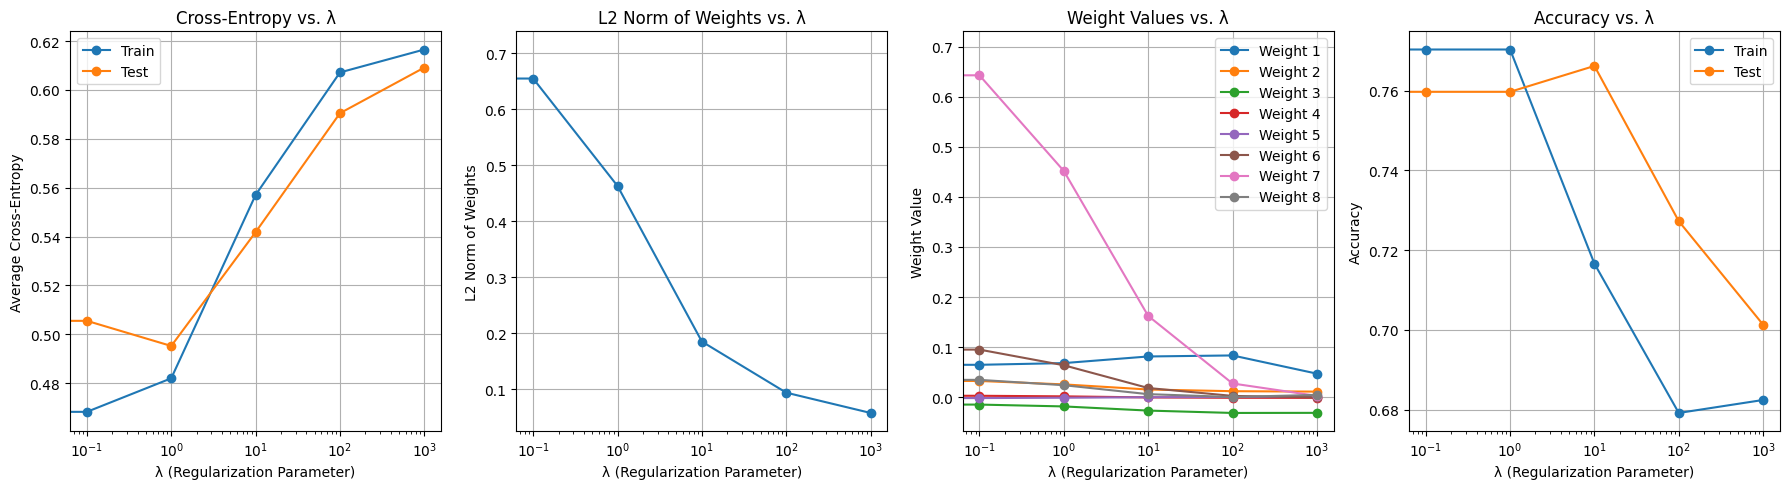

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_cross_entropies = []
test_cross_entropies = []
l2_norms = []
weights = []
train_accuracies = []
test_accuracies = []

for lmbda in lambdas:
    # C is the inverse of regularization strength; smaller values specify stronger regularization.
    # We use a large number for C when lambda is 0 to effectively have no regularization.
    C = 1 / lmbda if lmbda != 0 else 1e10

    model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
    model.fit(Xtrain, ytrain)

    # Cross-entropy
    y_train_pred_proba = model.predict_proba(Xtrain)
    train_ce = log_loss(ytrain, y_train_pred_proba)
    train_cross_entropies.append(train_ce)

    y_test_pred_proba = model.predict_proba(Xtest)
    test_ce = log_loss(ytest, y_test_pred_proba)
    test_cross_entropies.append(test_ce)

    # L2 norm of weights (excluding intercept)
    l2_norm = np.linalg.norm(model.coef_)
    l2_norms.append(l2_norm)

    # Weights
    weights.append(model.coef_[0])

    # Accuracy
    y_train_pred = model.predict(Xtrain)
    train_acc = accuracy_score(ytrain, y_train_pred)
    train_accuracies.append(train_acc)

    y_test_pred = model.predict(Xtest)
    test_acc = accuracy_score(ytest, y_test_pred)
    test_accuracies.append(test_acc)


# Plotting
plt.figure(figsize=(18, 5))

# Cross-entropy plot
plt.subplot(1, 4, 1)
plt.plot(lambdas, train_cross_entropies, marker='o', label='Train')
plt.plot(lambdas, test_cross_entropies, marker='o', label='Test')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Average Cross-Entropy')
plt.title('Cross-Entropy vs. λ')
plt.legend()
plt.grid(True)

# L2 norm of weights plot
plt.subplot(1, 4, 2)
plt.plot(lambdas, l2_norms, marker='o')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm of Weights vs. λ')
plt.grid(True)

# Actual values of weights plot
plt.subplot(1, 4, 3)
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i], marker='o', label=f'Weight {i+1}')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Weight Value')
plt.title('Weight Values vs. λ')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 4, 4)
plt.plot(lambdas, train_accuracies, marker='o', label='Train')
plt.plot(lambdas, test_accuracies, marker='o', label='Test')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. λ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Explanation of results:
As λ increases:
- The L2 norm of the weights decreases, indicating that the weights are shrinking towards zero.
- The individual weight values also tend to decrease in magnitude.
- The training cross-entropy and accuracy generally show less variation.
- The testing cross-entropy and accuracy might initially improve as regularization helps to prevent overfitting, but can worsen with very high λ values due to underfitting.

#(e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.  You will experiment with σ values of 0.1, 0.5, 1, 5 and 10

In [20]:
def gaussian_basis_functions(X, means, sigma):
    """
    Applies Gaussian basis functions to the input data.

    Args:
        X (np.ndarray): Input data matrix.
        means (np.ndarray): Array of means for the basis functions.
        sigma (float): Standard deviation for the basis functions.

    Returns:
        np.ndarray: Data transformed by the Gaussian basis functions.
    """
    X_transformed = np.zeros((X.shape[0], X.shape[1] * len(means)))
    for i in range(X.shape[1]):
        for j, mean in enumerate(means):
            X_transformed[:, i * len(means) + j] = np.exp(-((X[:, i] - mean)**2) / (2 * sigma**2))
    return X_transformed

sigmas = [0.1, 0.5, 1, 5, 10]
means = np.linspace(-10, 10, 5) # 5 means evenly spaced between -10 and 10

Xtrain_transformed = {}
Xtest_transformed = {}

for sigma in sigmas:
    Xtrain_transformed[sigma] = gaussian_basis_functions(Xtrain.values, means, sigma)
    Xtest_transformed[sigma] = gaussian_basis_functions(Xtest.values, means, sigma)
    print(f"Data transformed with sigma={sigma}. Shape of transformed training data: {Xtrain_transformed[sigma].shape}")

Data transformed with sigma=0.1. Shape of transformed training data: (614, 40)
Data transformed with sigma=0.5. Shape of transformed training data: (614, 40)
Data transformed with sigma=1. Shape of transformed training data: (614, 40)
Data transformed with sigma=5. Shape of transformed training data: (614, 40)
Data transformed with sigma=10. Shape of transformed training data: (614, 40)


#(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off

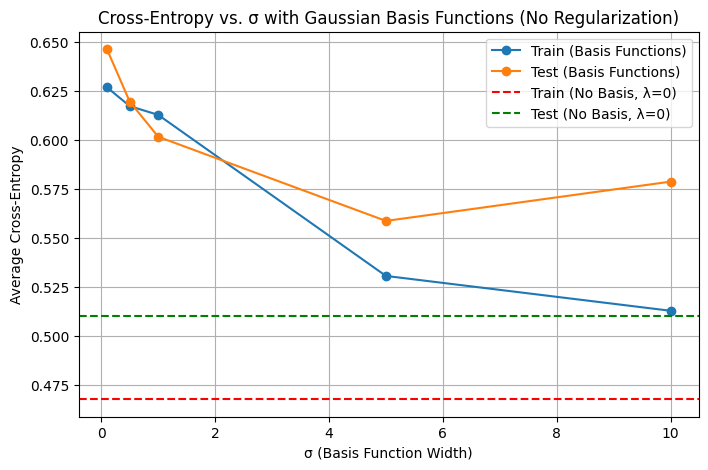

In [21]:
train_cross_entropies_basis = []
test_cross_entropies_basis = []

# Get baseline errors from part (d) with no regularization (lambda=0)
baseline_train_ce = train_cross_entropies[0]
baseline_test_ce = test_cross_entropies[0]

for sigma in sigmas:
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    model.fit(Xtrain_transformed[sigma], ytrain)

    y_train_pred_proba = model.predict_proba(Xtrain_transformed[sigma])
    train_ce = log_loss(ytrain, y_train_pred_proba)
    train_cross_entropies_basis.append(train_ce)

    y_test_pred_proba = model.predict_proba(Xtest_transformed[sigma])
    test_ce = log_loss(ytest, y_test_pred_proba)
    test_cross_entropies_basis.append(test_ce)

plt.figure(figsize=(8, 5))
plt.plot(sigmas, train_cross_entropies_basis, marker='o', label='Train (Basis Functions)')
plt.plot(sigmas, test_cross_entropies_basis, marker='o', label='Test (Basis Functions)')
plt.axhline(y=baseline_train_ce, color='r', linestyle='--', label='Train (No Basis, λ=0)')
plt.axhline(y=baseline_test_ce, color='g', linestyle='--', label='Test (No Basis, λ=0)')

plt.xlabel('σ (Basis Function Width)')
plt.ylabel('Average Cross-Entropy')
plt.title('Cross-Entropy vs. σ with Gaussian Basis Functions (No Regularization)')
plt.legend()
plt.grid(True)
plt.show()


Explanation of how σ influences overfitting and the bias-variance trade-off:
The width σ of the Gaussian basis functions affects the flexibility of the model.
- Smaller σ values result in narrower basis functions, which are more localized. This allows the model to fit the training data more closely, potentially leading to lower training error but higher variance and overfitting, especially if the data is noisy.
- Larger σ values result in wider basis functions, which are less localized and smoother. This makes the model less sensitive to individual data points, potentially leading to higher training error but lower variance and better generalization to unseen data (lower testing error), which can help to mitigate overfitting.
In terms of the bias-variance trade-off:
- Smaller σ values tend to increase variance and decrease bias.
- Larger σ values tend to decrease variance and increase bias.
The optimal σ value is a trade-off that minimizes the total error on unseen data.

(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

Shape of combined basis function training data: (614, 200)
Shape of combined basis function testing data: (154, 200)


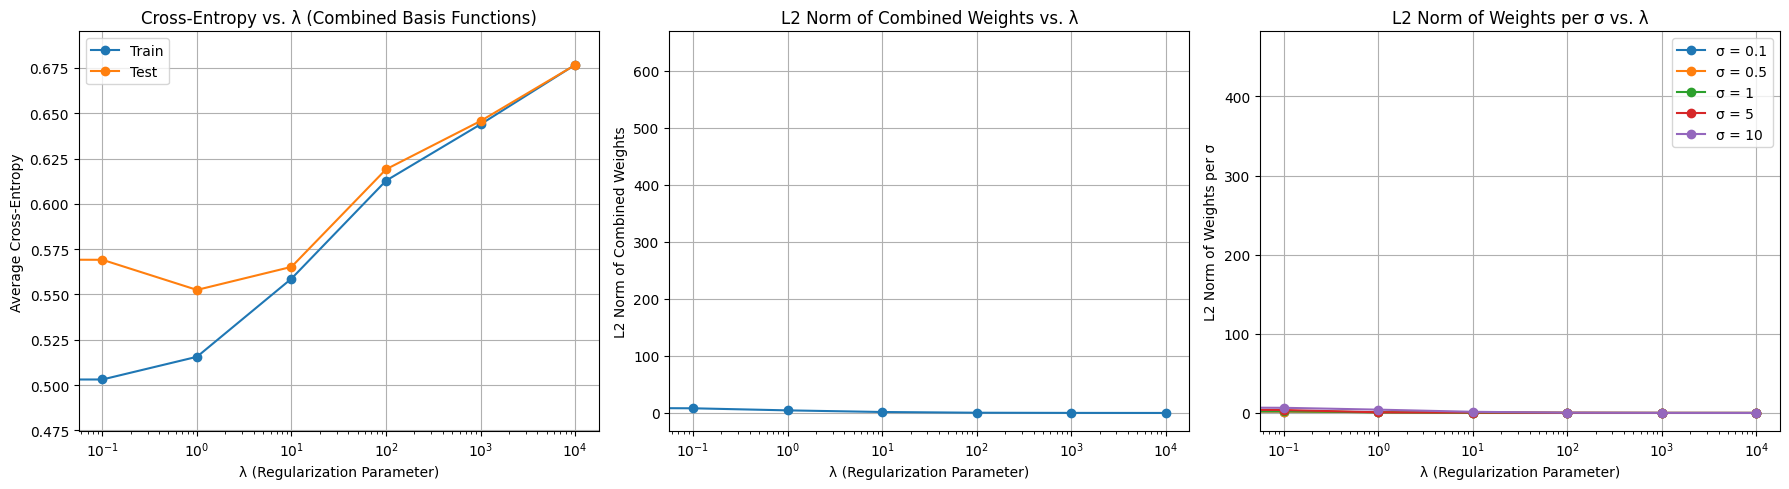

In [22]:
lambdas_g = [0, 0.1, 1, 10, 100, 1000, 10000]

# Combine all basis functions into a single design matrix
Xtrain_combined_basis = np.hstack([Xtrain_transformed[sigma] for sigma in sigmas])
Xtest_combined_basis = np.hstack([Xtest_transformed[sigma] for sigma in sigmas])

print("Shape of combined basis function training data:", Xtrain_combined_basis.shape)
print("Shape of combined basis function testing data:", Xtest_combined_basis.shape)


train_cross_entropies_combined = []
test_cross_entropies_combined = []
l2_norms_combined = []
l2_norms_by_sigma = {sigma: [] for sigma in sigmas}

for lmbda in lambdas_g:
    C = 1 / lmbda if lmbda != 0 else 1e10

    model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=10000) # Increased max_iter
    model.fit(Xtrain_combined_basis, ytrain)

    # Cross-entropy
    y_train_pred_proba = model.predict_proba(Xtrain_combined_basis)
    train_ce = log_loss(ytrain, y_train_pred_proba)
    train_cross_entropies_combined.append(train_ce)

    y_test_pred_proba = model.predict_proba(Xtest_combined_basis)
    test_ce = log_loss(ytest, y_test_pred_proba)
    test_cross_entropies_combined.append(test_ce)

    # L2 norm of combined weights
    l2_norm_combined = np.linalg.norm(model.coef_)
    l2_norms_combined.append(l2_norm_combined)

    # L2 norm of weights for each set of basis functions (per sigma)
    weights_combined = model.coef_[0]
    feature_dim = Xtrain.shape[1] # Number of original features
    means_dim = len(means) # Number of means (basis functions per feature)

    for i, sigma in enumerate(sigmas):
        start_index = i * feature_dim * means_dim
        end_index = start_index + feature_dim * means_dim
        weights_sigma = weights_combined[start_index:end_index]
        l2_norms_by_sigma[sigma].append(np.linalg.norm(weights_sigma))


# Plotting
plt.figure(figsize=(18, 5))

# Combined Cross-entropy plot
plt.subplot(1, 3, 1)
plt.plot(lambdas_g, train_cross_entropies_combined, marker='o', label='Train')
plt.plot(lambdas_g, test_cross_entropies_combined, marker='o', label='Test')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Average Cross-Entropy')
plt.title('Cross-Entropy vs. λ (Combined Basis Functions)')
plt.legend()
plt.grid(True)

# Combined L2 norm of weights plot
plt.subplot(1, 3, 2)
plt.plot(lambdas_g, l2_norms_combined, marker='o')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('L2 Norm of Combined Weights')
plt.title('L2 Norm of Combined Weights vs. λ')
plt.grid(True)

# L2 norm of weights by sigma plot
plt.subplot(1, 3, 3)
for sigma in sigmas:
    plt.plot(lambdas_g, l2_norms_by_sigma[sigma], marker='o', label=f'σ = {sigma}')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('L2 Norm of Weights per σ')
plt.title('L2 Norm of Weights per σ vs. λ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Explanation of results:
When combining basis functions of different widths and applying L2 regularization:
- Similar to part (d), as λ increases, the overall L2 norm of the weights decreases.
- The cross-entropy plots show how regularization affects training and testing error. Higher λ leads to more regularization, potentially reducing overfitting and improving test error initially, but can increase both errors if too strong.
- The plot of L2 norms of weights per σ shows how regularization affects the weights associated with basis functions of different widths.
  - For smaller σ (narrower basis functions), the weights might be larger initially (less regularization) but are penalized more heavily as λ increases, shrinking faster.
  - For larger σ (wider basis functions), the weights might be smaller initially, and their shrinkage with increasing λ might be less dramatic compared to the weights for narrower basis functions.
This shows how L2 regularization encourages simpler models by shrinking the weights, and how this effect can vary depending on the characteristics of the features (in this case, the width of the basis functions).

# (h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own).

To design a set of Gaussian basis functions that capture relationships between the inputs (i.e., interactions between features), you would need to use **multivariate Gaussian basis functions**.

Instead of applying a separate set of univariate Gaussian basis functions to each input variable independently, you would define basis functions over the joint space of multiple input variables.

A multivariate Gaussian basis function centered at a mean vector $\mu_i$ with covariance matrix $\Sigma_i$ for an input vector $x$ is defined as:

$$\phi_i(x) = \exp\left(-\frac{1}{2}(x - \mu_i)^T \Sigma_i^{-1} (x - \mu_i)\right)$$

Where:
- $x$ is the input vector.
- $\mu_i$ is the mean vector of the $i$-th basis function, representing the location of the center in the multi-dimensional input space.
- $\Sigma_i$ is the covariance matrix of the $i$-th basis function, which determines the shape and orientation of the basis function's contours.

To capture relationships between inputs, you would need to define basis functions whose covariance matrices $\Sigma_i$ are not diagonal. A non-diagonal covariance matrix allows the basis function to capture correlations or interactions between the input variables. For example, an elliptical contour for a 2D basis function that is rotated with respect to the axes indicates that the basis function is capturing a relationship between the two input variables.

You would need to decide on the number of basis functions, their mean vectors ($\mu_i$), and their covariance matrices ($\Sigma_i$). These parameters could be fixed based on prior knowledge, or they could be learned from the data.

**Impact on the bias-variance trade-off:**

Using multivariate Gaussian basis functions to capture relationships between inputs can have a significant impact on the bias-variance trade-off:

- **Reduced Bias:** By explicitly modeling interactions between features, the model becomes more flexible and has a higher capacity to capture complex, non-linear relationships in the data. This can lead to a reduction in bias, as the model is better able to approximate the true underlying function.

- **Increased Variance:** Introducing multivariate basis functions significantly increases the number of features (the size of the transformed feature space). This increased model complexity can lead to higher variance, making the model more sensitive to the specific training data and potentially leading to overfitting, especially with limited data. The model might fit the noise in the training data rather than the true signal.

- **Managing the Trade-off:** To manage this increased variance, you would likely need to use regularization techniques (like L2 regularization, as explored in previous parts) or increase the amount of training data. The choice of the number of basis functions, their locations, and their covariance matrices also influences the complexity and, therefore, the bias-variance trade-off. A larger number of basis functions or more complex covariance structures will generally increase model capacity, decreasing bias but increasing variance.

#(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would like to adapt the placement of these functions. Derive a learning algorithm that computes both the placement of the basis function, µi and the weight vector w from data (assuming that the width σ isfixed. You should still allow for L2 regularization of the weight vector. Note that your algorithm will need to be iterative.

Adaptive Basis Function Placement with Gradient Descent

To learn the placement of the basis functions ($\mu_i$) along with the weight vector ($w$), you can use an iterative optimization algorithm like gradient descent. The core idea is to find the values for both sets of parameters that minimize a chosen loss function.

This approach is different from using fixed, evenly-spaced basis functions because it allows the model to find the optimal locations for the basis functions to best fit the training data. This is akin to a single-hidden-layer neural network with fixed Gaussian activation functions where both the weights and the "neuron" centers are learned.

1. The Loss Function

The algorithm's objective is to minimize the L2-regularized cross-entropy loss. This loss function measures the error of the model's predictions while also penalizing large weights to prevent overfitting.

The predicted probability $\hat{y}$ for an input $\mathbf{x}$ is given by:

$$\hat{y} = \sigma_{sigmoid} \left( \sum_{i=1}^{M} w_i \exp\left(-\frac{||\mathbf{x} - \boldsymbol{\mu}_i||^2}{2\sigma^2}\right) \right)$$

The complete loss function to be minimized is:

$$L(\mathbf{w}, \boldsymbol{\mu}) = -\frac{1}{N} \sum_{k=1}^{N} [y_k \log(\hat{y}_k) + (1-y_k) \log(1-\hat{y}_k)] + \frac{\lambda}{2} \sum_{i=1}^{M} w_i^2$$

2. The Learning Algorithm

The algorithm proceeds iteratively, updating the parameters in the direction that reduces the loss.

Step 1: Initialization
 Randomly initialize the weight vector $\mathbf{w}$ and the mean vectors $\boldsymbol{\mu}_i$ for each basis function.

Step 2: Compute Gradients
In each iteration, compute the partial derivatives of the loss function with respect to each parameter. These gradients tell us the direction of steepest increase in the loss.

Gradient with respect to weights ($w_i$):
  This gradient is standard for logistic regression, with an added term for L2 regularization.

  $$\frac{\partial L}{\partial w_i} = \frac{1}{N} \sum_{k=1}^{N} (\hat{y}_k - y_k) \phi_i(\mathbf{x}_k) + \lambda w_i$$

Gradient with respect to means ($\boldsymbol{\mu}_i$):
  This requires the chain rule. It's the product of how the loss changes with the prediction, how the prediction changes with the basis function, and how the basis function changes with the mean.


  $$\frac{\partial L}{\partial \boldsymbol{\mu}_i} = \frac{1}{N} \sum_{k=1}^{N} (\hat{y}_k - y_k) w_i \phi_i(\mathbf{x}_k) \frac{(\mathbf{x}_k - \boldsymbol{\mu}_i)}{\sigma^2}$$

Step 3: Update Parameters
Update the parameters using the calculated gradients and a small learning rate ($\eta$) to take a step in the right direction.

  $$w_i \leftarrow w_i - \eta \frac{\partial L}{\partial w_i}$$

  $$\boldsymbol{\mu}_i \leftarrow \boldsymbol{\mu}_i - \eta \frac{\partial L}{\partial \boldsymbol{\mu}_i}$$

Step 4: Repeat
Repeat steps 2 and 3 until the loss function converges or a set number of iterations is reached.

This iterative process ensures that both the importance of each basis function (the weights) and their optimal locations (the means) are learned simultaneously from the data.



# (j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution? Explain your answer.

Yes, your algorithm converges, but it finds a locally optimal solution, not necessarily a globally optimal one.

The algorithm converges because gradient descent is a proven method for finding a minimum in a differentiable function. As it iteratively updates the parameters, the loss decreases until it reaches a point where the gradient is zero.

However, the solution is only locally optimal because the loss function is non-convex with respect to the basis function means (μ
i
​
 ). A non-convex function can have multiple "dips," or local minima, in its landscape. Gradient descent follows the steepest descent path, so it will simply find the bottom of the dip it started in, and it has no way of knowing if a deeper, globally optimal minimum exists elsewhere in the parameter space. The final solution is therefore highly dependent on the random initial placement of the basis function means.
